In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Filtrando elementos duplicados
dataset = pd.read_csv('data_input/All_recipe.csv')

quantidade_linhas = len(dataset)
print(f'Quantidade de linhas no dataset: {quantidade_linhas}')

dataset['sorted_pair'] = dataset.apply(lambda row: '-'.join(sorted([str(row['source']), str(row['target'])])), axis=1)

dataset = dataset.drop_duplicates(subset='sorted_pair')

dataset = dataset.drop(columns=['sorted_pair'])
print(dataset.head(10))

Quantidade de linhas no dataset: 729862
                  source           target  weight
0   feta cheese crumbles   grape tomatoes      15
1   feta cheese crumbles   garbanzo beans       6
2   feta cheese crumbles           garlic      58
3   feta cheese crumbles  romaine lettuce      20
4   feta cheese crumbles     purple onion      83
5   feta cheese crumbles     black olives      12
7         grape tomatoes   garbanzo beans       2
8         grape tomatoes           garlic      49
9         grape tomatoes  romaine lettuce      16
10        grape tomatoes     purple onion      54


In [28]:
# Obter a quantidade de linhas
quantidade_linhas = len(dataset)
print(f'Quantidade de linhas no dataset: {quantidade_linhas}')

Quantidade de linhas no dataset: 364435


In [29]:
# Carregando o arquivo CSV
ingredientes_selecao = pd.read_csv('data_input/50ingredientes.csv')

# Exibindo as primeiras linhas para verificar se os dados foram carregados corretamente
print(ingredientes_selecao.head())

           Label  Id
0           milk   1
1  vegetable oil   2
2           eggs   3
3       tomatoes   4
4  green chilies   5


In [30]:
# Carregar os arquivos
df_vertices = dataset
df_ingredientes = ingredientes_selecao

# Obter os nomes das colunas 'source' e 'target' do DataFrame df_vertices
nomes_source = df_vertices.iloc[:, 0]
nomes_target = df_vertices.iloc[:, 1]

# Filtrar os dados das colunas 'source' e 'target' do DataFrame df_vertices com base nos nomes de df_ingredientes
vertices_filtrados = df_vertices[(nomes_source.isin(df_ingredientes['Label'])) & (nomes_target.isin(df_ingredientes['Label']))]

# Exibir as linhas filtradas preservando todos os dados da terceira coluna
print(vertices_filtrados)
vertices_filtrados.to_csv('data_output/newarestas.csv', index=False)

                                   source                             target  \
22                                 garlic                       purple onion   
44                                   milk                      vegetable oil   
45                                   milk                               eggs   
46                                   milk                           tomatoes   
47                                   milk                     green tomatoes   
...                                   ...                                ...   
723124                       hoagie rolls                       yellow onion   
727464                               milk  Oscar Mayer Deli Fresh Smoked Ham   
727468  Oscar Mayer Deli Fresh Smoked Ham                             garlic   
727469  Oscar Mayer Deli Fresh Smoked Ham                               eggs   
727473  Oscar Mayer Deli Fresh Smoked Ham                             onions   

        weight  
22         399  
44   

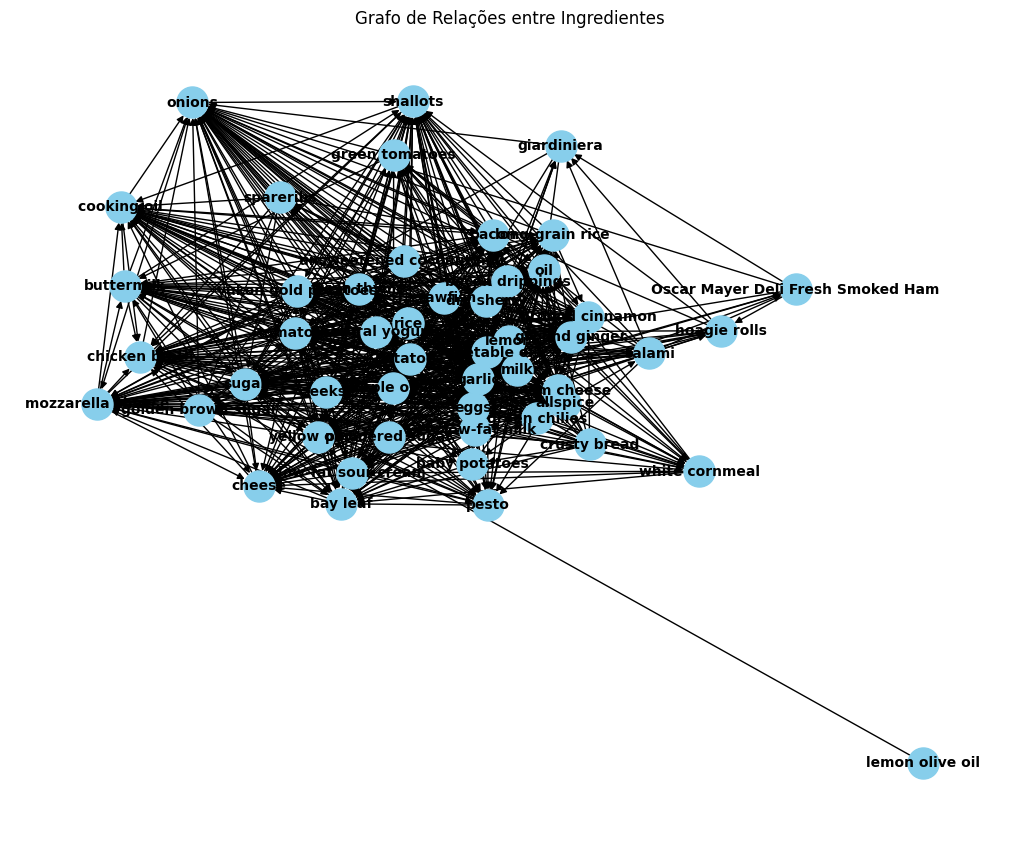

In [31]:

# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionando arestas ao grafo com base nos dados filtrados
for index, row in vertices_filtrados.iterrows():
    G.add_edge(row['source'], row['target'])

# Layout do grafo
pos = nx.spring_layout(G)


plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Grafo de Relações entre Ingredientes')
plt.show()


In [32]:


# Filtrando os dados das colunas 'source' e 'target' do DataFrame df_vertices com base nos nomes de df_ingredientes
vertices_filtrados = df_vertices[(df_vertices['source'].isin(df_ingredientes['Label'])) & 
                                 (df_vertices['target'].isin(df_ingredientes['Label']))]

# Criando um grafo direcionado
G = nx.DiGraph()

# Adicionar arestas ao grafo com pesos
edges = [(row['source'], row['target'], row['weight']) for _, row in vertices_filtrados.iterrows()]
G.add_weighted_edges_from(edges)

# encontrar os 3 ingredientes mais utilizados com um ingrediente específico
def top_3_used_with(G, ingredient):
    # Encontrar os vizinhos do ingrediente
    neighbors = G[ingredient]
    
    # Ordenando os vizinhos pelos pesos das arestas
    top_3 = sorted(neighbors.items(), key=lambda x: x[1]['weight'], reverse=True)[:3]
    
    return top_3

# Ingrediente de interesse
ingredient_choice = 'cooking oil'

# Encontrar os 3 ingredientes mais utilizados
top_ingredients = top_3_used_with(G, ingredient_choice)

print(f"Os 3 ingredientes mais utilizados com '{ingredient_choice}':")
for ingredient, data in top_ingredients:
    print(f"Ingrediente: {ingredient}, Frequência: {data['weight']}")


Os 3 ingredientes mais utilizados com 'cooking oil':
Ingrediente: garlic, Frequência: 191
Ingrediente: onions, Frequência: 164
Ingrediente: tomatoes, Frequência: 54
